# Geometric transformations

Pobranie zależności:

In [2]:
%matplotlib notebook

from __future__ import print_function

import math
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform as tf

Biblioteka scikit-image wspiera obsługę następujących przekształceń geometrycznych: 

+ podobieństwa (similarity), 
+ transformacji afinicznej (affine transform), 
+ homograficznego (projective) 
+ wielomianowego (polynomial)

Transformacje geometryczne mogą zostać przeprowadzone za pomocą parametrów (skali, rotacji, translacji).


In [7]:
tform = tf.SimilarityTransform(
    scale=1, rotation=math.pi/2, translation=(0, 1)
)

print(tform.params)

[[  6.12323400e-17  -1.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   6.12323400e-17   1.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]


Transformacje geometryczne mogą zostać przeprowadzone za pomocą macierzy transformacji.

In [4]:
matrix = tform.params.copy()
matrix[1, 2] = 2
tform2 = tf.SimilarityTransform(matrix)

Powyższe transforamcje mogą zostać użyte to obustornnych transformacji między systemami.

In [5]:
coord = [1, 0]
print(tform2(coord))
print(tform2.inverse(tform(coord)))

[[  6.12323400e-17   3.00000000e+00]]
[[  0.00000000e+00  -6.12323400e-17]]


## Image warping

Metoda zwana image warping pozwala na usunięcie zniekształceń z obrazów (distortions)

https://en.wikipedia.org/wiki/Image_warping

<IPython.core.display.Javascript object>


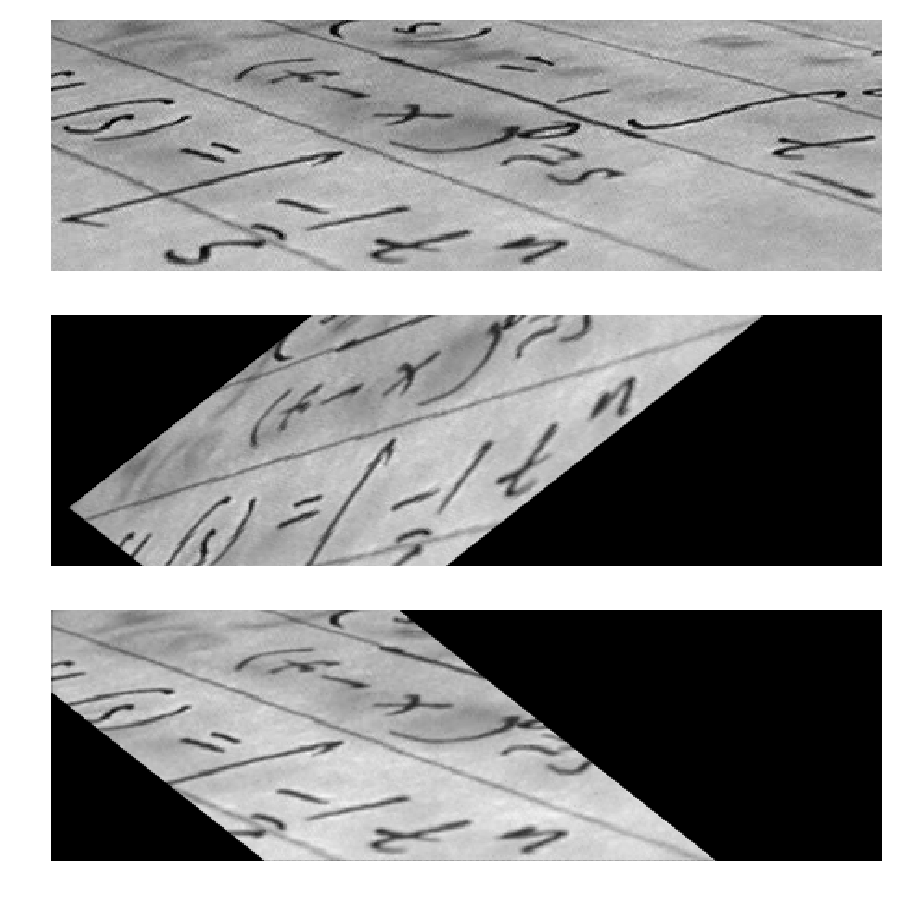

In [6]:
text = data.text()

tform = tf.SimilarityTransform(scale=1, rotation=math.pi/4,
                               translation=(text.shape[0]/2, -100))

rotated = tf.warp(text, tform)
back_rotated = tf.warp(rotated, tform.inverse)

fig, ax = plt.subplots(nrows=3, figsize=(9, 9))

ax[0].imshow(text, cmap=plt.cm.gray, aspect='auto')
ax[1].imshow(rotated, cmap=plt.cm.gray, aspect='auto')
ax[2].imshow(back_rotated, cmap=plt.cm.gray, aspect='auto')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

## Estymacja parametrów

Poza podstawowymi metodami transformacji obrazu możliwe jest też estymowanie parametrów przekształcenia geometrycznego używając metody najmniejszych kwadratów.

Funkcjonalność ta może zostać użyta do rejestracji lub rektyfikacji obrazu - dopasowania obrazów na podstawie punktów odniesienia.

Zakładając, że chcemy rozpoznać litery na fotografii, która została zrobiona pod pewnym kątem - litery te będą zniekształcone. Proste algorytmy dopasowania wzorców nie byłyby w stanie odpowiednio ich rozpoznać.Korzystając z funkcji oferowanych przez scikit-image możemy skorzystać z opcji ‘wypaczenia’ obrazu w sposób odwracający zniekształcenie spowodowane nietypową perspektywą zdjęcia.


<IPython.core.display.Javascript object>


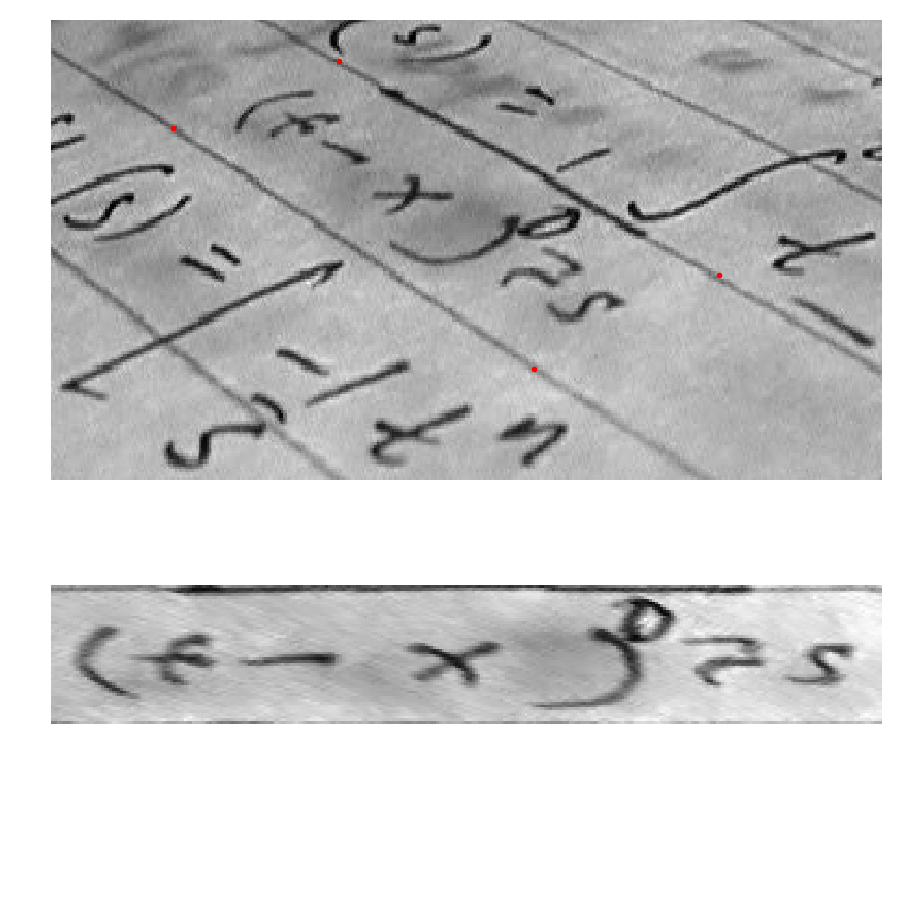

In [26]:
text = data.text()

src = np.array([[0, 0], [0, 50], [300, 50], [300, 0]])
dst = np.array([[155, 15], [65, 40], [260, 130], [360, 95]])

tform3 = tf.ProjectiveTransform()
tform3.estimate(src, dst)
warped = tf.warp(text, tform3, output_shape=(50, 300))

fig, ax = plt.subplots(nrows=2, figsize=(9, 9))

ax[0].imshow(text, cmap=plt.cm.gray, aspect='auto')
ax[0].plot(dst[:, 0], dst[:, 1], '.r')
ax[1].imshow(warped, cmap=plt.cm.gray)

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()